In [2]:
#coding=utf-8
##############################################
#
# Author:       Shen Wenrui
# Date:         20180326
# Description:
#
##############################################

import sys
from selenium import webdriver

baiduUrl = 'http://www.baidu.com'

appleHomepageUrl = 'https://www.apple.com/cn/'
# Apple-Id Signin page
appleIdHomePageUrl = 'https://appleid.apple.com'
#signPageUrl = '/#!&page=signin'
#signinUrl = appleIdHomepageUrl + signPageUrl

# Apple-Id Signup page
appleIdSignUpPageUrl = appleIdHomePageUrl + '/account'

browser = webdriver.Chrome()

In [3]:
testUrl = appleIdSignUpPageUrl
print(testUrl)

browser.implicitly_wait(5)
browser.get(testUrl)
#html = browser.page_source
#print(html)


https://appleid.apple.com/account


In [4]:
authImgBase64_xpath = "/html/body/div[@id='content']/aid-web/div[@class='app-container']/div[@id='app-content']/" \
                    "div[@id='flow']/create-app/aid-create//div[@class='idms-flow-container']//div[@class='idms-step-content']/" \
                    "div/div/div[6]/div/create-captcha/" \
                    "div/div/div/div/div[1]/div/idms-captcha/div/img"

authImgElement = browser.find_element_by_xpath(authImgBase64_xpath)

In [5]:
#print('authImgElement is: ' + str(authImgElement.get_attribute('innerHTML')))

In [10]:
authImgBase64 = authImgElement.get_attribute('src')
authImgBase64

'data:image/jpeg;base64, /9j/4AAQSkZJRgABAgAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCABGAKADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD1zGngNHsvERDuazA+a3PaRMHIA5HyEjn60ubIsD9onkeUY8zC7L5f7h/hLY+XnB49Kpax4r07QIg+p+JNMgATzIZmZWkkXONpjXlgfVMfd6euB4b+KuleLPEM2kabIwUQtM8kqLHGu0jLxM3

In [7]:
import base64 
authImgStr = base64.b64decode(authImgBase64[len('data:image/jpeg;base64, '):])
authImg_f = open("001.jpeg", "wb")
authImg_f.write(authImgStr)
authImg_f.close()

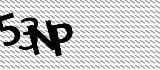

In [8]:
from IPython.display import Image 
Image(filename='001.jpeg')

In [38]:
#import PIL.Image
#im = PIL.Image.open('001.jpeg')
#im.show()

In [39]:
browser.quit()